# Proyecto 1: Interpolación, Integracion y raíces de Ecuaciones


Función asignada: *Polinomios de Legendre asociados* 

https://es.wikipedia.org/wiki/Polinomios_asociados_de_Legendre

Los polinomios asociados de Legendre son las soluciones canónicasde la **ecuación de Legendre**.

<center>$(1-x^{2})y'' - 2xy' + (l[l+1]-\frac{m^{2}}{1-x^{2}})y = 0$</center>

O de forma equivalente:

<center>$([1-x^{2}]y')' + (l[l+1]-\frac{m^{2}}{1-x^{2}})y = 0$</center>

**$l: $Grado del polinomio, $m: $ Orden del polinomio**

Esta ecuación tiene soluciones distintas de 0 que son no singulares en **[-1,1]** sólo si ℓ y m son enteros con 0 ≤ m ≤ ℓ. 

> Cuando m es cero y ℓ entero, estas funciones son idénticas a los **polinomios de Legendre. **

En general, cuando ℓ y m son enteros, las soluciones regulares a veces son llamadas "polinomios asociados de Legendre", incluso cuando estas no son polinomios en el caso de que m sea impar. 


## Polinomios ortogonales


Los polinomios ortogonales son conjuntos de polinomios que forman una base ortogonal de cierto espacio de Hilbert. Los polinomios ortogonales son importantes porque aparecen en la teoría de ecuaciones diferenciales, muy especialmente en la teoría de Sturm-Liouville, la teoría de espacios de Hilbert, la teoría de la aproximación de funciones y la mecánica cuántica.

Asumiendo que $0\leq m \leq l$ se satisface  la condición de ortogonalidad para un m fijo:


<center>$\int _{-1}^{1} P_{k}^{m}P_{l}^{m}dx = \frac{2(l+m)!}{(2l+1)(l-m)!}\delta_{k,l}$</center>

Donde $\delta_{k,l}$ es el delta de kronecher.

## Relaciones de recurrencia 

En matemática, una relación de recurrencia es una ecuación que define una secuencia recursiva; cada término de la secuencia es definido como una función de términos anteriores.

Los polinomios de Legendre pueden construirse usando las tres relaciones de recurrencia

$(n+1)P_{n+1} = (2n+1)xP_{n}- nP_{n-1}$

y

$\frac{x^{2}-1}{n} \frac{d}{dx}P_n = xP_n - P_{n-1} $



## Aplicaciones de polinomios de Legendre en Física

Los polinomios de Legendre, igual que los de Hermite y Laguerre, son útiles en ramas de la Física y en el cálculo numérico ya que permiten el cómputo de integrales definidas sin necesidad de usar fórmulas analíticas, tan sólo fijando como intervalo de integración [ -1 ; +1] (con el correspondiente cambio de variable). Esto es especialmente interesante en programas de cómputo que tratan de resolver una integral definida.


$ \frac{\partial u}{\partial t}
   = h^2 \left( \frac{\partial^2 u}{\partial x^2}
      + \frac{\partial^2 u}{\partial y^2}
      + \frac{\partial^2 u}{\partial z^2} \right)$
      
      
$\frac{du}{dt} and \frac{d^2 u}{dx^2} $

In [445]:
import numpy as np
import random
from sympy import *
import matplotlib.pyplot as plt
from scipy.misc import comb
import scipy.integrate as sci_integrate
%matplotlib inline

# 1) Interpolación
## 1.1 ) Elabórese un programa para calcular su polinomio ortogonal $P_n(x)$ usando las relaciones de recurrencia



In [446]:
def Pn(n):
    x = symbols('x')
    Ps = [0, x]
    if n == 0:
        return 1
    elif n == 1:
        return x
    else:
        h = n-1    
        p = ( (2.*h +1.)*x*Pn(h)- h*Pn(h-1.))/(h+1.) 
        return p
    
def dfdx_Pn(n):
    """Retorna la derivada del polinomio de lagrange de grado n"""
    x = symbols('x')
    dPn = (x*Pn(n)-Pn(n-1.))*(n/(x**2-1.))
    return dPn

In [447]:
grado = 3
P = simplify(Pn(grado))
print "Pn de grado", grado, ": ",P
#P.subs(x,3)

Pn de grado 3 :  x*(2.5*x**2 - 1.5)


## 1.2) Dentro del intervalo de definición escójase ne = 11 nodos equidistantes xe(i), i:1,..,11 y encuéntrese los valores

In [448]:
f = lambdify(x, P)
xl = np.linspace(-1,1,11)
yl = f(xl)

print "xe: ",xl
print "\nye: ",yl

xe:  [-1.  -0.8 -0.6 -0.4 -0.2  0.   0.2  0.4  0.6  0.8  1. ]

ye:  [-1.   -0.08  0.36  0.44  0.28 -0.   -0.28 -0.44 -0.36  0.08  1.  ]


##  1.3) Elabore 3 programas para calcular los polinomios interpolantes en la base de algoritmos: Lagrange global, segmentaria lineal y parabólica

In [449]:
def lagrange(n,xl,yl):
    """Retorna polinomio interpolador de grado n-1. Tomando como entrada n puntos."""
    polinomio = 0 #POLINOMIO SOLUCION
    polinomios = [] #GUARDO CADA POLINOMIO
    for i in range(n): #sumas
        lagranges = 1.0
        for j in range(n): #producto
            if i != j:
                lagranges = lagranges*(symbols('x')-xl[j])  / (xl[i] - xl[j])
        polinomios.append(lagranges*yl[i])
        polinomio = polinomio +lagranges*yl[i]
        
    return polinomio, polinomios
        

In [450]:
np.random.rand()

0.4933888778688016

In [451]:
def segm_lineal(n,a,h,punto,pn,noise = None):
    """Guarda los polinomios, devuelve estimacion en x
    n = Numero de puntos en malla
    a = Punto de inicio del intervalo
    h = distancia entre nodos de la malla
    yl = valor de los puntos evaluados en la funcion
    noise= ruido random
    """
    #Encontrar segmento donde esta el punto x que queremos estimar
    k = int((punto-a)/h)
    #print "K: ",k
    xk = a + (k-1)*h
    xk_1 = xk+h
    yk = pn(xk)
    yk_1 = pn(xk)
    
    if noise is not None:
        yk += np.random.rand()*noise
        yk_1 += np.random.rand()*noise
    
    polinomio = yk +(yk_1 - yk)*(symbols('x')-xk)/h
    estimacion = yk +(yk_1 - yk)*(punto-xk)/h
        
    return polinomio, estimacion
            


In [452]:
def segm_cuad(n,a,h,punto,pn,noise = None):
    """Guarda los polinomios, devuelve estimacion en x
    n = Numero de puntos en malla
    a = Punto de inicio del intervalo
    h = distancia entre nodos de la malla
    yl = valor de los puntos evaluados en la funcion
    """
    #Encontrar segmento donde esta el punto x
    k = int((punto-a)/h)
    #print "K: ",k
    xk = a + (k-1)*h
    xk_1 = xk+h
    xk_2 = xk + 2*h
    yk = pn(xk)
    yk_1 = pn(xk)
    yk_2 = pn(xk_2)
    
    if noise is not None:
        yk += np.random.rand()*noise
        yk_1 += np.random.rand()*noise
        yk_2 += np.random.rand()*noise
    
    polinomio = yk + (yk_1 - yk)*((symbols('x')-xk)/h ) + (yk_2-2*yk_1+yk)*(symbols('x')-xk)*(symbols('x')-xk_1)/h**2
    
    estimacion = yk +(yk_1 - yk)*((punto-xk)/h ) +(yk_2-2*yk_1+yk)*(punto-xk)*(punto-xk_1)/h**2
        
    return polinomio, estimacion
            

## 1.4  Dentro del intervalo de definición escoja n = 200 nodos equidistantes y encuentre los valores del polinomio en estos nodos mediante de 3 funciones intepolantes y compárese los resultados con los valores exactos.

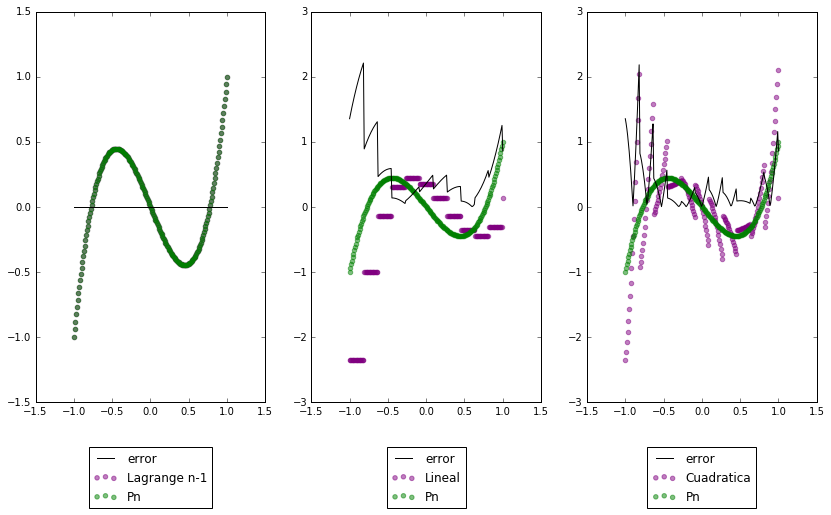

In [453]:
#Lagrange
n = len(xl)
poli_lagrange, __ = lagrange(n,xl,yl) 
f_lagrange = lambdify(x, poli_lagrange) #lambdificada de lagrange

x200 = np.linspace(-1,1,200)
yreal = f(x200)
ylagrange = f_lagrange(x200)

#Segm lineal
a, b = -1., 1.
h = (b - a)/n # n = 11 da mayor error estimando en 200 puntos! Cambiar por un n más pequeño mejora mucho
ylineal = []
for punto in x200:
    polinomio, estimacion = segm_lineal(n,a,h,punto,f)
    ylineal.append(estimacion)
ylineal = np.array(ylineal)

#Segm cuadr
a, b = -1., 1.
h = (b - a)/n # n = 11 da mayor error estimando en 200 puntos! Cambiar por un n más pequeño mejora mucho
ycuad = []
for punto in x200:
    polinomio, estimacion = segm_cuad(n,a,h,punto,f)
    ycuad.append(estimacion)
ycuad = np.array(ycuad)

####################################################
plt.figure(figsize=(14,7))
plt.subplot(1,3,1)
plt.scatter(x200,ylagrange, color = "purple", label= "Lagrange n-1",alpha=.5)
plt.scatter(x200,yreal, color = "green", label= "Pn",alpha=.5)
plt.plot(x200,np.abs(yreal-ylagrange), color = "black", label = "error")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1))

plt.subplot(1,3,2)
plt.scatter(x200,ylineal, color = "purple", label= "Lineal",alpha=.5)
plt.scatter(x200,yreal, color = "green", label= "Pn",alpha=.5)
plt.plot(x200,np.abs(yreal-ylineal) , color = "black", label = "error")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1))

plt.subplot(1,3,3)
plt.scatter(x200,ycuad, color = "purple", label= "Cuadratica",alpha=.5)
plt.scatter(x200,yreal, color = "green", label= "Pn",alpha=.5)
plt.plot(x200,np.abs( yreal-ycuad), color = "black", label = "error")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1))

## 1.5) Introduzca los errores aleatorios de 1% en los valores del polinomio yei = yei+0.01* random, y con estos nuevos valores realice la tarea 1.4

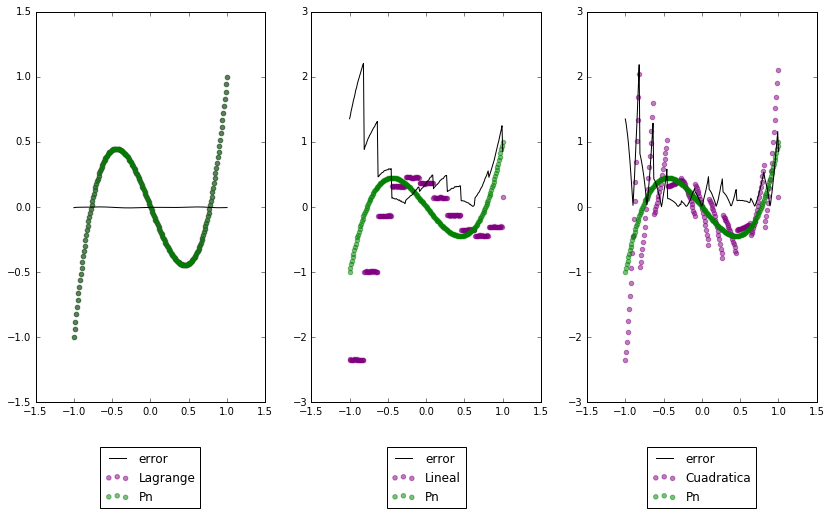

In [454]:
r = np.random.rand(len(xl))
noise = 0.01
error = r*noise
yrand = yl + error

#### Metodo  lagrange

poli_lagrange, __ = lagrange(n,xl,yrand) 
f_lagrange_rand = lambdify(x, poli_lagrange) #lambdificada de lagrange
ylagrange_rand = f_lagrange_rand(x200)
error_lagrange = yreal-ylagrange_rand

### Metodo interpolacion lineal
ylineal_rand = []
for punto in x200:
    polinomio, estimacion = segm_lineal(n,a,h,punto,f,noise)
    ylineal_rand.append(estimacion)
ylineal_rand = np.array(ylineal_rand)
    
error_lineal = np.abs(yreal-ylineal_rand) 

### Metodo interpolacion cuadratica
ycuad_rand = []
for punto in x200:
    polinomio, estimacion = segm_cuad(n,a,h,punto,f,noise)
    ycuad_rand.append(estimacion)
ycuad_rand = np.array(ycuad_rand)
    
error_cuad = np.abs( yreal-ycuad_rand)

#############################################

plt.figure(figsize=(14,7))
plt.subplot(1,3,1)
plt.scatter(x200,ylagrange, color = "purple", label= "Lagrange",alpha=.5)
plt.scatter(x200,yreal, color = "green", label= "Pn",alpha=.5)
plt.plot(x200,error_lagrange, color = "black", label = "error")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1))

plt.subplot(1,3,2)
plt.scatter(x200,ylineal_rand, color = "purple", label= "Lineal",alpha=.5)
plt.scatter(x200,yreal, color = "green", label= "Pn",alpha=.5)
plt.plot(x200,error_lineal, color = "black", label = "error")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1))

plt.subplot(1,3,3)
plt.scatter(x200,ycuad_rand, color = "purple", label= "Cuadratica",alpha=.5)
plt.scatter(x200,yreal, color = "green", label= "Pn",alpha=.5)
plt.plot(x200,error_cuad, color = "black", label = "error")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1))

## 1.6) Realícese las tareas 1.4 y 1.5 con programas SPLINE-SEVAL
**Nota:** se utiliza un programa profesional en vez de spline seval, la librería numpy de python trae su propio método de <a href="https://docs.scipy.org/doc/numpy/reference/generated/numpy.interp.html">interpolación lineal</a> y scipy uno de <a href= "https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.InterpolatedUnivariateSpline.html#scipy.interpolate.InterpolatedUnivariateSpline">splines.</a>



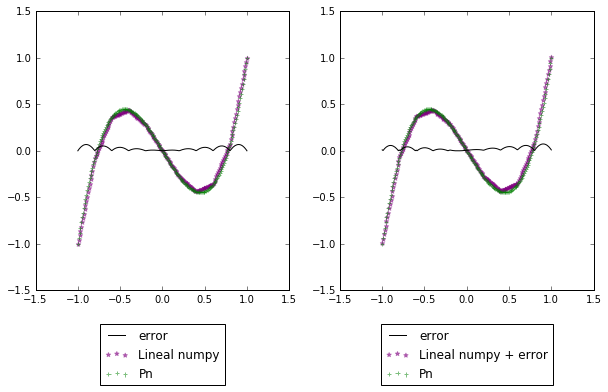

In [455]:
#numpy lineal
yinterp_lineal = np.interp(x200, xl, yl)

#mas ruido
r = np.random.rand(len(xl))
noise = 0.01
error = r*noise
yl_err = yl + error
yinterp_lineal_error = np.interp(x200, xl, yl_err)

plt.figure(figsize=(10,5))
#plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
plt.scatter(x200,yinterp_lineal, color = "purple", label= "Lineal numpy",alpha=.5, marker="*")
plt.scatter(x200,yreal, color = "green", label= "Pn",alpha=.5,marker="+")
plt.plot(x200,np.abs(yreal-yinterp_lineal), color = "black", label = "error")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1))

plt.subplot(1,2,2)
plt.scatter(x200,yinterp_lineal_error , color = "purple", label= "Lineal numpy + error",alpha=.5, marker="*")
plt.scatter(x200,yreal, color = "green", label= "Pn",alpha=.5, marker="+")
plt.plot(x200,np.abs(yreal-yinterp_lineal_error), color = "black", label = "error")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1))

In [456]:
from scipy.interpolate import UnivariateSpline

In [457]:
#scipy splines
spl = UnivariateSpline(xl, yl)
yinterp_splines = spl(x200)

#mas ruido
r = np.random.rand(len(xl))
noise = 0.01
error = r*noise
yl_err = yl + error
spl_err = UnivariateSpline(xl, yl_err)
yinterp_splines_err = spl_err(x200)

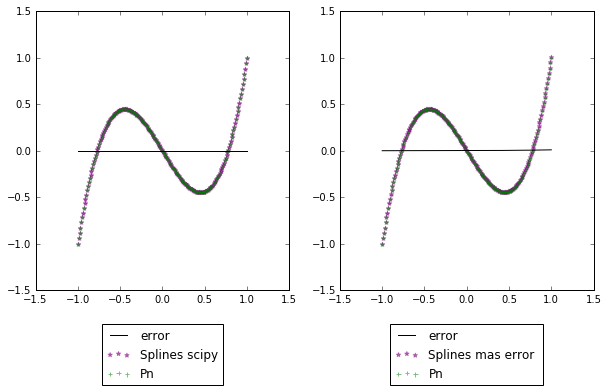

In [458]:
plt.figure(figsize=(10,5))
#plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
plt.scatter(x200,yinterp_splines, color = "purple", label= "Splines scipy",alpha=.5, marker="*")
plt.scatter(x200,yreal, color = "green", label= "Pn",alpha=.5,marker="+")
plt.plot(x200,np.abs(yreal-yinterp_splines), color = "black", label = "error")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1))

plt.subplot(1,2,2)
plt.scatter(x200,yinterp_splines_err , color = "purple", label= "Splines mas error ",alpha=.5, marker="*")
plt.scatter(x200,yreal, color = "green", label= "Pn",alpha=.5, marker="+")
plt.plot(x200,np.abs(yreal-yinterp_splines_err), color = "black", label = "error")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1))

Como se puede ver el rendimiento de los programas de librerías es superior en especial en los splines.

## 1.7) Calcular los polinomios intepolantes en base a algoritmos de interpolación segmentaria lineal y parabólica para  las primeras derivadas y realícese las tareas 1.4.



In [459]:
a,b = -0.999, 0.999 #para evitar tener inf y division por 0
dPn = simplify(dfdx_Pn(grado))
df = lambdify(x, dPn)
xl = np.linspace(a,b,11)
yl = df(xl)
print dPn
print xl,"\n",yl

7.5*x**2 - 1.5
[-0.999  -0.7992 -0.5994 -0.3996 -0.1998  0.      0.1998  0.3996  0.5994
  0.7992  0.999 ] 
[ 5.9850075  3.2904048  1.1946027 -0.3023988 -1.2005997 -1.5       -1.2005997
 -0.3023988  1.1946027  3.2904048  5.9850075]


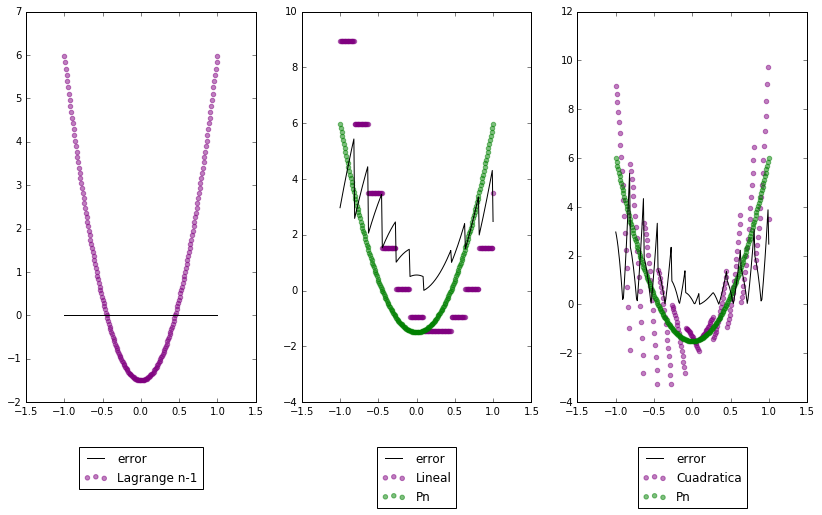

In [460]:
#Lagrange
n = len(xl)
poli_lagrange, __ = lagrange(n,xl,yl) 
f_lagrange = lambdify(x, poli_lagrange) #lambdificada de lagrange

x200 = np.linspace(a,b,200)
yreal = df(x200)
ylagrange = f_lagrange(x200)

#Segm lineal
h = (b - a)/n # n = 11 da mayor error estimando en 200 puntos! Cambiar por un n más pequeño mejora mucho
ylineal = []
for punto in x200:
    polinomio, estimacion = segm_lineal(n,a,h,punto,df)
    ylineal.append(estimacion)
ylineal = np.array(ylineal)

#Segm cuadr
h = (b - a)/n # n = 11 da mayor error estimando en 200 puntos! Cambiar por un n más pequeño mejora mucho
ycuad = []
for punto in x200:
    polinomio, estimacion = segm_cuad(n,a,h,punto,df)
    ycuad.append(estimacion)
ycuad = np.array(ycuad)

####################################################
plt.figure(figsize=(14,7))
plt.subplot(1,3,1)
plt.scatter(x200,ylagrange, color = "purple", label= "Lagrange n-1",alpha=.5)#plt.scatter(x200,yreal, color = "green", label= "Pn",alpha=.5)
plt.plot(x200,np.abs(yreal-ylagrange), color = "black", label = "error")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1))

plt.subplot(1,3,2)
plt.scatter(x200,ylineal, color = "purple", label= "Lineal",alpha=.5)
plt.scatter(x200,yreal, color = "green", label= "Pn",alpha=.5)
plt.plot(x200,np.abs(yreal-ylineal) , color = "black", label = "error")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1))

plt.subplot(1,3,3)
plt.scatter(x200,ycuad, color = "purple", label= "Cuadratica",alpha=.5)
plt.scatter(x200,yreal, color = "green", label= "Pn",alpha=.5)
plt.plot(x200,np.abs( yreal-ycuad), color = "black", label = "error")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1))

## 1.8) Realícese las tareas 1.4 y 1.5primera y segunda derivada con programas SPLINE-SEVAL

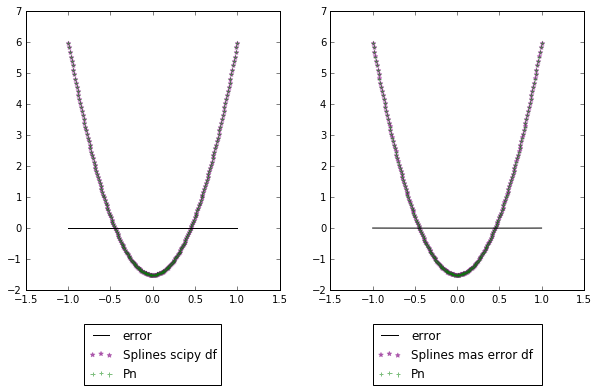

In [461]:
#Primera derivada usando splines

#a,b = -0.999, 0.999 #para evitar tener inf y division por 0
a,b=-1,1
dPn = simplify(dfdx_Pn(grado))
df = lambdify(x, dPn)
xl = np.linspace(a,b,11)
yl = df(xl)
spl = UnivariateSpline(xl, yl)
yinterp_splines = spl(x200)
yreal = df(x200)
#mas ruido
r = np.random.rand(len(xl))
noise = 0.01
error = r*noise
yl_err = yl + error
spl_err = UnivariateSpline(xl, yl_err)
yinterp_splines_err = spl_err(x200)


#graficas

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.scatter(x200,yinterp_splines, color = "purple", label= "Splines scipy df",alpha=.5, marker="*")
plt.scatter(x200,yreal, color = "green", label= "Pn",alpha=.5,marker="+")
plt.plot(x200,np.abs(yreal-yinterp_splines), color = "black", label = "error")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1))

plt.subplot(1,2,2)
plt.scatter(x200,yinterp_splines_err , color = "purple", label= "Splines mas error df ",alpha=.5, marker="*")
plt.scatter(x200,yreal, color = "green", label= "Pn",alpha=.5, marker="+")
plt.plot(x200,np.abs(yreal-yinterp_splines_err), color = "black", label = "error")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1))

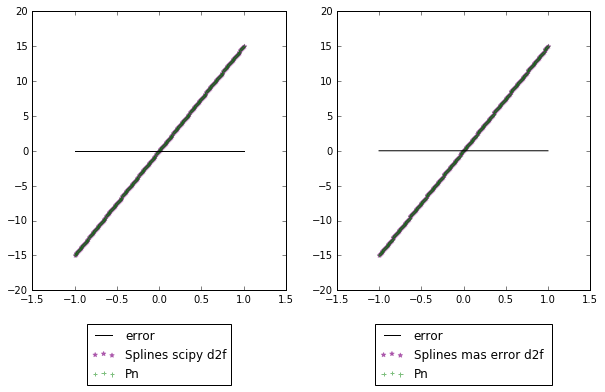

In [462]:
#Segunda derivada usando splines

#a,b = -0.999, 0.999 #para evitar tener inf y division por 0
a,b=-1,1

d2Pn = simplify(dPn.diff(x))
d2f = lambdify(x, d2Pn)
xl2 = np.linspace(a,b,11)
yl2 = d2f(xl)

spl = UnivariateSpline(xl2, yl2)
yinterp_splines = spl(x200)
yreal = d2f(x200)
#mas ruido
r = np.random.rand(len(xl2))
noise = 0.01
error = r*noise
yl2_err = yl2 + error
spl_err = UnivariateSpline(xl2, yl2_err)
yinterp_splines_err = spl_err(x200)


#graficas

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.scatter(x200,yinterp_splines, color = "purple", label= "Splines scipy d2f",alpha=.5, marker="*")
plt.scatter(x200,yreal, color = "green", label= "Pn",alpha=.5,marker="+")
plt.plot(x200,np.abs(yreal-yinterp_splines), color = "black", label = "error")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1))

plt.subplot(1,2,2)
plt.scatter(x200,yinterp_splines_err , color = "purple", label= "Splines mas error d2f ",alpha=.5, marker="*")
plt.scatter(x200,yreal, color = "green", label= "Pn",alpha=.5, marker="+")
plt.plot(x200,np.abs(yreal-yinterp_splines_err), color = "black", label = "error")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1))

# 2) Integración

 ## 2.1) Dentro del intervalo de definición de su polinomio calcúleselos valores de las integrales usando cuadraturas de trapecios, de Simpson y de Gauss con selección de paso de integración automático en la base del algoritmo de Runge

**Trapecios**


In [463]:
def integral_trapecios(f,a,b,n):
    area = 0 # area bajo la curva
    h = (b-a)/n
    x = [a]
    y = [f(a)]
    for i in range(n): # cada segmento
        xi = a + h*i #x0 y x1
        xi1 = a+ h*(i+1)
        yi,yi1 = f(xi),f(xi1)
        area_trap = (h/2.)*(yi+yi1)
        area += area_trap
        x.append(xi1)
        y.append(yi1)
    return area,x,y

def auto_trap(f, a, b, tol= 1e-3,N_init= 4):
    N = N_init
    i= 0
    I_prev,__,__ = integral_trapecios(f,a,b,N)
    error =10
    while error > tol:
        i+=1
        N = 2*N
        I,__,__= integral_trapecios(f,a,b,N)
        error = np.abs(I-I_prev)#/(2**i -1)
        I_prev = I
        
    return I-error,N

Pn de grado 3 :  x*(2.5*x**2 - 1.5)
Metodo de trapecios:  0.0


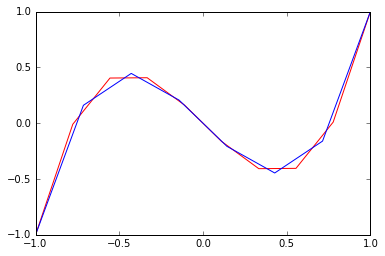

In [464]:
#Pn lo integraremos entre lim_a y lim_b
P = simplify(Pn(grado))
print "Pn de grado", grado, ": ",P
x = symbols('x')
f = lambdify(x, P)
lim_a, lim_b = -1.,1.

#Trapecios sin paso automtico
integral, xp, yp = integral_trapecios(f,lim_a,lim_b,7)
print "Metodo de trapecios: ",integral
plt.plot(np.linspace(lim_a,lim_b,10),f(np.linspace(lim_a,lim_b,10)),c="r")
plt.plot(xp,yp,c="b")

In [465]:
I, n = auto_trap(f, lim_a, lim_b, tol= 1e-7,N_init= 4)
print "Metodo de trapecios adaptativo: ",I
print "N: ",n

Metodo de trapecios adaptativo:  0.0
N:  8


**Simpson 1/3**

In [466]:
def integral_simpson(f,a,b,n):
    suma = 0 
    h = (b-a)/n
    for i in range(1,n): # terminos del medio
        #print i
        xi = a + h*(i) #x0 y x1
        if i%2 == 0: 
            suma+=2*f(xi)
        else:
            suma+=4*f(xi)
    suma = (h/3.)*(f(a)+suma+f(b))
    return suma
        
def auto_simp(f, a, b, tol= 1e-3,N_init= 4):
    N = N_init
    i= 0
    I_prev = integral_simpson(f,a,b,N)
    error =10
    while error > tol:
        i+=1
        N = 2*N
        I = integral_simpson(f,a,b,N)
        error = np.abs(I-I_prev)#/(2**i -1)
        I_prev = I
        
    return I-error,N


In [467]:
I, n = auto_simp(f, lim_a, lim_b, tol= 1e-7,N_init= 1)
print "Metodo de simpson adaptativo: ",I
print "N: ",n

Metodo de simpson adaptativo:  0.0
N:  2


**Cuadratura de Gauss-legendre**

In [468]:
def legendre_rodrigues(n):
    "Retorna polinomio de legendre grado n"
    suma = 0
    x = symbols('x')
    polinomio = 0 #POLINOMIO SOLUCION
    for k in range(n+1):
        tmp = (comb(n,k)**2)*((x+1.)**(n-k))*(x-1.)**k
        suma = suma+tmp
    p = (1.0/(2.**n))*suma
    return p

def cuadratura_gauss(a,b,n,f):
    #Obtengo los 0's del polinomio de legendre con formula de rodrigues
    x = Symbol('x')
    zeros = solve(legendre_rodrigues(n),x) #Pn tiene n 0's
    
    #0's son mis xi (nodos) y los puedo elevar a un numero, ahora es un sistema lineal :D
    #Derivada del polinomio
    DPn = diff(legendre_rodrigues(n)) 
    integ = 0
    #Despejo coeficientes Wi
    
    w = []
    
    for xi in zeros:
        wi = 2./((1.-xi**2)*(DPn.evalf(subs={x:xi}))**2)
        w.append(wi)
   
    # Cambio de variables para integrar en (a,b)
    integ = 0
    for k in range(0,n):
        xk = zeros[k]
        integ += w[k]*f((b+a)/2. + (b-a)*(float(xk)/2.))
    
    integ = ((b-a)/2.)*integ
    
    for i in range(n):
        print "W"+str(i)+": ",w[k]," x"+str(i)+" :",zeros[i]
    return integ

def auto_gauss(f, a, b, tol = 1e-4):
    n = 1
    error = 10
    Iprev = 0
    while error> tol:
        I = cuadratura_gauss(a, b, n, f)
        error = np.abs(I-Iprev)
        Iprev = I
        n+=1
    print "n optimo: ", n
        
    return I, n


In [469]:
I,n = auto_gauss(f, lim_a, lim_b )
print "Metodo de cuadratura de Gauss: ",I
print "N: ",n

W0:  2.00000000000000  x0 : 0.0
n optimo:  2
Metodo de cuadratura de Gauss:  0
N:  2


## 2.2) Realícese las tareas 2.1 con programa QUANC8

En vez de usar el algoritmo quanc se usará librería profesional de python:scipy con el fin de comparar algoritmos hechos por el estudiante. Este método usa a su vez la librería en Fortran <a> QUADPACK</a>.

In [470]:
result0 = sci_integrate.quad(f,lim_a, lim_b)
print "Metodo numerico python scipy: ",result0[0]

Metodo numerico python scipy:  0.0


## 2.3 Presente el análisis comparativo de los resultados obtenidos en los puntos 2.1 y 2.2

En este caso los 3 algoritmos presentan buen desempeño y calculan la integral con exactitud, sin embargo en otros ejemplos en mi repositorio se puede observar que de los tres métodos implementados **la cuadratura de gauss es la mejor**. Los métodos de simpson y trapecios necesitan dividir la malla quidistante en muchos segementos para mejorar el cálculo mientras que la cuadratura de gauss usa las raices del polinomio de legendre para hacer una malla no equidistante que da un resultado más exacto.

# 3) Solución de ecuaciones trascendentes